# FCNN with GloVe Embeddings Sentiment Classifier
## This notebook outlines the application of GloVe embeddings on a Fully Connected Neural Network for building a Movie Sentiment Analyzer 

### Importing the necessary libraries

In [7]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

In [8]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer





### Download the dataset from Kaggle
https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [9]:
movie_reviews = pd.read_csv("IMDB_Dataset.csv")

### Data Exploration

In [10]:
import tensorflow as tf

print(tf.test.is_gpu_available())

print(tf.config.list_physical_devices('GPU'))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False
[]


In [11]:
movie_reviews.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [12]:
movie_reviews.isnull().values.any()

False

In [13]:
movie_reviews.shape

(50000, 2)

In [14]:
movie_reviews["review"][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

<Axes: xlabel='sentiment', ylabel='count'>

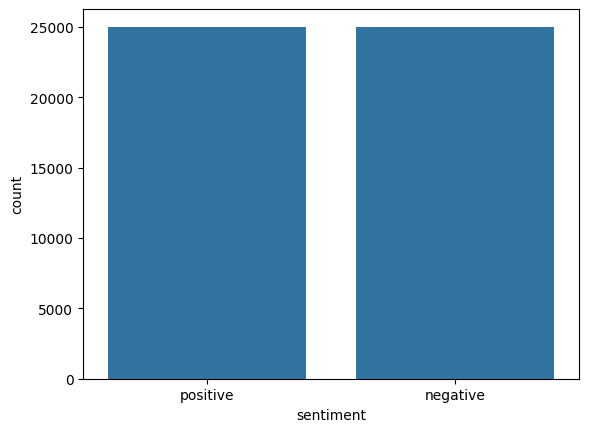

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x='sentiment', data=movie_reviews)

### Pre-processing of text
- Removing html tags
- Removing punctutations and numbers
- Removing Multiple spaces
- so on

In [16]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [17]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [18]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [19]:
X[3]

'Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them '

### Creating numerical labels from categorical values

In [20]:
y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

### Split the dataset to train and test

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [22]:
X_train

['That what kept asking myself during the many fights screaming matches swearing and general mayhem that permeate the minutes The comparisons also stand up when you think of the one dimensional characters who have so little depth that it is virtually impossible to care what happens to them They are just badly written cyphers for the director to hang his multicultural beliefs on topic that has been done much better in other dramas both on TV and the cinema must confess m not really one for spotting bad performances during film but it must be said that Nichola Burley as the heroine slutty best friend and Wasim Zakir as the nasty bullying brother were absolutely terrible don know what acting school they graduated from but if was them d apply for full refund post haste Only Samina Awan in the lead role manages to impress in cast of so called British talent that we ll probably never hear from again At least that the hope Next time hire different scout Another intriguing thought is the hideo

### Use Tokenizer to integer encode the documents

In [23]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [24]:
X_train

[[9,
  43,
  786,
  2121,
  524,
  299,
  1,
  104,
  1860,
  1989,
  4281,
  2,
  782,
  4786,
  9,
  1,
  224,
  1,
  77,
  763,
  51,
  49,
  17,
  97,
  3,
  1,
  24,
  1968,
  98,
  31,
  23,
  32,
  116,
  1101,
  9,
  6,
  5,
  2323,
  1163,
  4,
  449,
  43,
  540,
  4,
  88,
  28,
  20,
  37,
  892,
  397,
  13,
  1,
  154,
  4,
  2935,
  22,
  4318,
  18,
  2897,
  9,
  42,
  71,
  218,
  69,
  123,
  7,
  76,
  3100,
  193,
  18,
  232,
  2,
  1,
  427,
  198,
  4888,
  147,
  19,
  60,
  24,
  13,
  70,
  358,
  299,
  16,
  15,
  6,
  198,
  25,
  302,
  9,
  11,
  1,
  1820,
  112,
  413,
  2,
  11,
  1,
  1651,
  562,
  67,
  419,
  373,
  82,
  114,
  43,
  110,
  361,
  28,
  33,
  15,
  41,
  10,
  88,
  441,
  13,
  357,
  1145,
  59,
  7,
  1,
  460,
  214,
  992,
  4,
  4124,
  7,
  174,
  3,
  32,
  433,
  680,
  607,
  9,
  66,
  227,
  233,
  107,
  830,
  33,
  169,
  27,
  217,
  9,
  1,
  423,
  360,
  53,
  3696,
  273,
  157,
  1672,
  187,
  5,
  1,
  711,

### Pad Sequences to create equal-length inputs

In [25]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 500

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

### Load GloVe embedding into memory

### GloVe Embeddings
- glove.6B.50d.txt (` 175 MB)

### GloVe embeddings is a popular word embedding model where each word is represented as a vector of real numbers.

In [26]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.50d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

The code loops through each line of the GloVe file.

line.split() splits each line into a list of strings. The first element (records[0]) is the word, and the rest are the vector dimensions.

The vector dimensions (a list of numbers) are converted into a NumPy array using asarray with the dtype='float32' to ensure all values are floats.

The word is then stored as a key in embeddings_dictionary, with its corresponding vector as the value.

In [27]:
embeddings_dictionary

{'the': array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
        -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
         2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
         1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
        -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
        -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
         4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
         7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
        -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
         1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
       dtype=float32),
 ',': array([ 0.013441,  0.23682 , -0.16899 ,  0.40951 ,  0.63812 ,  0.47709 ,
        -0.42852 , -0.55641 , -0.364   , -0.23938 ,  0.13001 , -0.063734,
        -0.39575 , -0.48162 ,  0.23291 ,  0.090201, -0.13324 ,  0.078639,
        -0.4

{'the': array([ 4.1800e-01,  2.4968e-01, ... , -7.8581e-01], dtype=float32)}

'the' is a word, and its corresponding word vector (a 50-dimensional array) is stored as its value. 

These embeddings capture semantic meaning, allowing words with similar meanings to have similar vectors.

Pre-trained GloVe Embedding Sizes: 
- GloVe (Global Vectors for Word Representation) provides pre-trained word embeddings in various sizes, typically with dimensions like 50, 100, 200, or 300.
- The number of dimensions is a design choice made when creating the embeddings and influences the balance between the amount of semantic information captured and computational efficiency.

- 50d embeddings: Compact representation, less computational overhead, but may lose some nuanced information.
- 100d, 200d, 300d embeddings: Capture more semantic detail but require more memory and computation.


### Create Embedding matrix for our Kaggle dataset

In [38]:
embedding_matrix = zeros((vocab_size, 50))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

Embedding Matrix:
-  A matrix where each row represents the vector of a word in your vocabulary.
- It's used in neural networks (especially for text) to convert words into their corresponding numerical representations (embeddings) for training.



### Build the model - Basic Neural Network

In [29]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

C:\Users\Rober\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen, trainable=False)

- The embedding layer is responsible for turning word indices (which represent words in your vocabulary) into dense word vectors of fixed size.
- vocab_size: The size of the vocabulary (the number of unique words).
- 50: The size of the embeddings (50 dimensions) corresponds to the pre-trained GloVe embeddings you're using.
- weights=[embedding_matrix]: The pre-trained GloVe embeddings are passed to the weights parameter.
- input_length=maxlen: The maximum length of your sequences (the number of words in each review).
- trainable=False: The embeddings are static and won't be updated during training.

### Compile the model

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     4,627,350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,627,350 (17.65 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,627,350 (17.65 MB)

None


### Fit the model

In [31]:
history = model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.6380 - loss: 0.6501 - val_acc: 0.7114 - val_loss: 0.6077
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.7752 - loss: 0.4739 - val_acc: 0.7239 - val_loss: 0.5828
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8124 - loss: 0.4173 - val_acc: 0.7180 - val_loss: 0.5934
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8323 - loss: 0.3825 - val_acc: 0.7176 - val_loss: 0.6122
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8379 - loss: 0.3676 - val_acc: 0.7124 - val_loss: 0.6748
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8460 - loss: 0.3506 - val_acc: 0.7139 - val_loss: 0.6685
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8527 - loss: 0.3367 - val_acc: 0.7134 - val_loss: 0.6764
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8585 - loss: 0.3312 - val_acc: 0.7176 - val_loss: 0.6950
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - ac

### Evaluate Training phase

In [32]:
score = model.evaluate(X_train, y_train, verbose=1)
score

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step - acc: 0.9226 - loss: 0.2177


[0.4339997470378876, 0.8774250149726868]

In [33]:
print("Train Loss:", score[0])
print("Train Accuracy:", score[1])

Train Loss: 0.4339997470378876
Train Accuracy: 0.8774250149726868


### Evaluate Testing phase

In [34]:
score = model.evaluate(X_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - acc: 0.6867 - loss: 1.2822


In [35]:
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 1.3230106830596924
Test Accuracy: 0.6848999857902527


### Plot the training and testing accuracy and loss

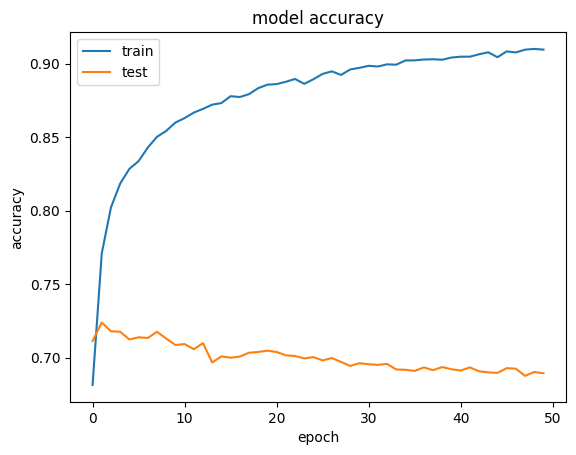

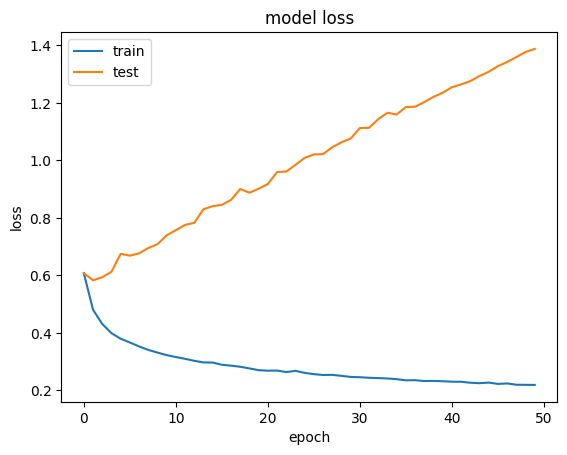

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### What's happening here?

In [37]:
best model: low bias low variance, explainable model, ethical

SyntaxError: invalid syntax (188910753.py, line 1)